<a href="https://colab.research.google.com/github/tushar2704/Data-Science-Master/blob/main/Logistic_Regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Classification using Binary Logistic Regression Model**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

**Importing the data file (in csv format) into colab**


***Saving the imported file in colab with the name "diab_data"***


In [4]:
#import io
#diab_data = pd.read_csv(io.BytesIO(data_to_load['diabetes.csv']))

In [7]:
diab_data = pd.read_csv('diabetes.csv')

**Let's have a look at the data**


In [8]:
diab_data.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,neg
1,0,137,40,35,168,43.1,2.288,33,pos
2,3,78,50,32,88,31.0,0.248,26,pos
3,2,197,70,45,543,30.5,0.158,53,pos
4,1,189,60,23,846,30.1,0.398,59,pos


In [9]:
#getting the type of datd
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  392 non-null    int64  
 1   glucose   392 non-null    int64  
 2   pressure  392 non-null    int64  
 3   triceps   392 non-null    int64  
 4   insulin   392 non-null    int64  
 5   mass      392 non-null    float64
 6   pedigree  392 non-null    float64
 7   age       392 non-null    int64  
 8   diabetes  392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 27.7+ KB


**Note**: The variable/feature "diabetes" is recognized as "object".

*   We need to change the values of the variable "diabetes" to zero and one
*   We change the value "pos" to 1 and "neg" to 0. Generally, the event of interest is coded/represented as "1" and non-event as "0"
*   To do this change, we use "map" function


In [10]:
diab_data['diabetes'] = diab_data['diabetes'].map({'neg':0, 'pos':1})

In [11]:
diab_data.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


In [12]:
#the datatype for diabetes should now be int64
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  392 non-null    int64  
 1   glucose   392 non-null    int64  
 2   pressure  392 non-null    int64  
 3   triceps   392 non-null    int64  
 4   insulin   392 non-null    int64  
 5   mass      392 non-null    float64
 6   pedigree  392 non-null    float64
 7   age       392 non-null    int64  
 8   diabetes  392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 27.7 KB


Let us visualize how the "probability of having diabetes" changes when there is a change in another variable. 

Let us consider the variable "pedigree" for this purpose

Jitter is simply the addition of a small amount of horizontal (or vertical) variability to the data in order to ensure all data points are visible



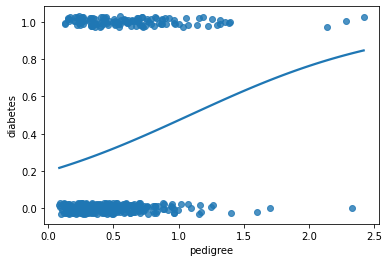

In [16]:
sns.regplot(x='pedigree', y='diabetes', data=diab_data, y_jitter=0.03,logistic=True, ci=None)
plt.show()

Let us now get the summary statistics of the different variables in the data set using the "describe" function


In [20]:
diab_data.describe(include='all')

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Fitting a binary logistic regression model**

*   Let us first split the data into **"training data set"** and **"test data set"**
*   We use 80% of the data for training set and 20% for test set. However, we can change this proportion to 70-30 or 75-25 also
*   For splitting the data we use a function "train_test_split" from SciKit learn library

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
train_data, test_data = train_test_split(diab_data, random_state=1, test_size=0.20)

In [30]:
train_data.head()


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
334,1,117,60,23,106,33.8,0.466,27,0
258,0,180,90,26,90,36.5,0.314,35,1
139,0,78,88,29,40,36.9,0.434,21,0
310,1,181,78,42,293,40.0,1.258,22,1
349,2,101,58,17,265,24.2,0.614,23,0


In [26]:
test_data.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
81,3,111,90,12,78,28.4,0.495,29,0
165,6,105,70,32,68,30.8,0.122,37,0
351,0,95,64,39,105,44.6,0.366,22,0
119,0,165,90,33,680,52.3,0.427,23,0
379,11,120,80,37,150,42.3,0.785,48,1


In [36]:
train_data.shape

(313, 9)

In [37]:
test_data.shape

(79, 9)

# We will now fit a binary logistic regression model


In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

diab_formula = ('diabetes ~ pregnant + glucose + pressure + triceps + insulin + mass + pedigree + age')

diab_model = logit(formula=diab_formula, data=train_data).fit()


Optimization terminated successfully.
         Current function value: 0.432239
         Iterations 7


Getting the summary of the model


In [45]:
print(diab_model.summary())

                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  313
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            8
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.3248
Time:                        03:27:03   Log-Likelihood:                -135.29
converged:                       True   LL-Null:                       -200.36
Covariance Type:            nonrobust   LLR p-value:                 2.638e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.9277      1.430     -7.644      0.000     -13.730      -8.126
pregnant       0.0170      0.069      0.246      0.805      -0.118       0.153
glucose        0.0435      0.007      6.037      0.0

In [ ]:
#p value  significant for 

Getting the Odds Ratio (OR)


In [46]:
print(np.exp(diab_model.params))

Intercept    0.000018
pregnant     1.017185
glucose      1.044446
pressure     0.998796
triceps      1.005876
insulin      0.998497
mass         1.089810
pedigree     2.232448
age          1.048077
dtype: float64


**Evaluating the Model**

*   We evaluate the model by applying it on **test** data 
*   For this purpose we use some packages from SciKit learn


In [47]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


In [49]:
#Applying the model on test data, getting the predictions and storing it in a variable called "predicted_prob"

predicted_prob = diab_model.predict(exog = test_data)

In [57]:
predicted_prob

81     0.118861
165    0.145014
351    0.162425
119    0.773954
379    0.709961
         ...   
23     0.924049
293    0.127744
13     0.556996
90     0.152288
61     0.690491
Length: 79, dtype: float64

In [53]:
#Let us define the cut-off for the predicted probabilities - Let us start with 0.5 
#(and then change it as required)

cutoff = 0.5

In [55]:
# Compute predicted class/group based on cut-off and store it in a variable called "diab_predicted"

diab_predicted = np.where(predicted_prob > cutoff, 1, 0)

In [56]:
diab_predicted

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [58]:
# Assign the original/actual values from the test sample to diab_actual

diab_actual = test_data['diabetes']

In [59]:
# Compute and print confusion matrix using crosstab function

conf_matrix = pd.crosstab(diab_actual, diab_predicted, 
                          rownames =['actual'],
                          colnames=['predicted'],
                          margins=True)


In [62]:
# Print the confusion matrix
print(conf_matrix)


predicted   0   1  All
actual                
0          46   9   55
1           8  16   24
All        54  25   79


**Classification accuracy**


In [63]:
accuracy = accuracy_score(diab_actual, diab_predicted)

print(accuracy)



0.7848101265822784


In [66]:
#Getting accuracy in %
print('Accuracy: %.2f' % (accuracy*100) + "%")


Accuracy: 78.48%


**Classification report**


In [67]:
print(classification_report(diab_actual, diab_predicted))


              precision    recall  f1-score   support

           0       0.85      0.84      0.84        55
           1       0.64      0.67      0.65        24

    accuracy                           0.78        79
   macro avg       0.75      0.75      0.75        79
weighted avg       0.79      0.78      0.79        79



**F1 Score**


In [68]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(diab_actual, diab_predicted)))



F1 Score: 0.6530612244897959


**ROC_AUC estimation**


In [69]:
roc_auc = roc_auc_score(diab_actual, diab_predicted)
print('AUC: %.2f' % (roc_auc*100) + "%")


AUC: 75.15%


**Reciever Operating Curve**


In [70]:
#First we need to install plot-metric
!pip install plot-metric


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


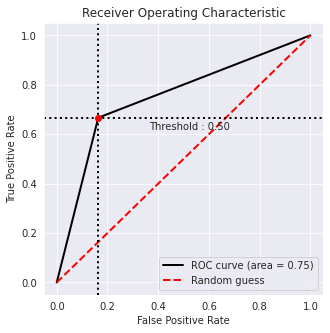

In [71]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(diab_actual,
                          diab_predicted,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()
